# Tutorial 6
# Artificial Neural Networks

# Neural Networks using Keras
Two well-known deep learning frameworks that are closely related to one another are Keras and TensorFlow. The primary distinction is that TensorFlow is just one deep learning framework that Keras, an open-source high-level neural networks API, operates on top of. 

Let's take a look at how we can use Keras to build the two-layer neural network that we introduced earlier. To build a linear collection of layers, first declare a Sequential model in Keras:

In [1]:
#!pip install tensorflow
#!pip install keras

In [2]:
# Fixing a random seed ensures reproducible results
import numpy as np
import random
import tensorflow
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [3]:
#Load library
from sklearn import preprocessing
import  numpy  as  np

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

#Create features
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])
features

array([[-100.1, 3240.1],
       [-200.2, -234.1],
       [5000.5,  150.1],
       [6000.6, -125.1],
       [9000.9, -673.1]])

In [4]:
#Create a standardizer
scaler = preprocessing.StandardScaler()

#Convert features
features_standardized = scaler.fit_transform(features)

#Display features
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [5]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [6]:
from keras.models import Sequential
# from keras import models
model = Sequential()

## Designing a Neural Network
* We will create a two-layer neural network (when counting layers we don’t include the input layer because it does not have any parameters to learn) using Keras’ sequential model. 
* Each layer is “dense” (also called fully connected), meaning that all the units in the previous layer are connected to all the neurals in the next layer. 
* In the first hidden layer we set units=16, meaning that layer contains 16 units with ReLU activation functions: activation='relu'. 
* In Keras, the first hidden layer of any network has to include an input_shape parameter, which is the shape of feature data. For example, (10,) tells the first layer to expect each observation to have 10 feature values. 
* In second layer is the same as the first, without the need for the input_shape parameter. This network is designed for binary classification so the output layer contains only one unit with a sigmoid activation function, which constrains the output to between 0 and 1 (representing the probability an observation is class 1).

* Finally, before we can train our model, we need to tell Keras how we want our network to learn. We do this using the compile method, with our optimization algorithm (RMSProp), loss function (binary_crossentropy), and one or more performance metrics.

In [7]:
#Load library
from keras import models
from keras import layers

# Start creating neural network
network = models.Sequential()

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units = 16, activation = "relu", input_shape = (10,)))

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units = 16, activation = "relu"))

# Added fully connected layer that uses sigmoid function as activation function
network.add(layers.Dense(units = 1, activation = "sigmoid"))

#Compile neural network
network . compile ( loss = "binary_crossentropy" , # cross entropy
                optimizer = "rmsprop" ,   # root mean square propagation method
                metrics = [ "accuracy" ]) # performance indicators は accuracy

* For each layer in the hidden and output layers we must define the number of units to include in the layer and the activation function. Overall, the more units we have in a layer, the more our network is able to learn complex patterns. However, more units might make our network overfit the training data in a way detrimental to the performance on the test data.

For hidden layers, a popular activation function is the rectified linear unit (ReLU):

f ( z ) = max ( 0 , z )

where z is the sum of the weighted inputs and bias. As we can see, if z is greater than 0, the activation function returns z; otherwise, the function returns 0. This simple activation function has a number of desirable properties (a discussion of which is beyond the scope of this book) and this has made it a popular choice in neural networks. We should be aware, however, that many dozens of activation functions exist.

* Second, we need to define the number of hidden layers to use in the network. More layers allow the network to learn more complex relationships, but with a computational cost.

* Third, we have to define the structure of the activation function (if any) of the output layer. The nature of the output function is often determined by the goal of the network. Here are some common output layer patterns:

Binary classification: One unit with a sigmoid activation function.

Multiclass classification: k units (where k is the number of target classes) and a softmax activation function.

Regression: One unit with no activation function.

* Fourth, we need to define a loss function (the function that measures how well a predicted value matches the true value); this is again often determined by the problem type:

Binary classification: Binary cross-entropy.
Multiclass classification: Categorical cross-entropy.
Regression: Mean square error.

* Fifth, we have to define an optimizer, which intuitively can be thought of as our strategy “walking around” the loss function to find the parameter values that produce the lowest error. Common choices for optimizers are stochastic gradient descent, stochastic gradient descent with momentum, root mean square propagation, and adaptive moment estimation (more information on these optimizers in “See Also”).

* Sixth, we can select one or more metrics to use to evaluate the performance, such as accuracy.

Keras offers two ways for creating neural networks. Keras’ sequential model creates neural networks by stacking together layers. An alternative method for creating neural networks is called the functional API, but that is more for researchers rather than practitioners.

# Rice (Cammeo and Osmancik) – understanding the problem

A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.

Among  the certified rice grown in TURKEY,  the  Osmancik species, which has a large planting area since 1997 and the Cammeo species grown since 2014 have been selected for the study. When looking at the general characteristics of Osmancik species, they have a wide, long, glassy and dull appearance. When looking at the general characteristics of the Cammeo species, they have wide and long, glassy and dull in appearance. A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice. 

In [8]:
#pip install ucimlrepo

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [10]:
print(X, y)

       Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
3805  11441  415.858002         170.486771          85.756592      0.864280   
3806  11625  421.390015         167.714798          89.462570      0.845850   
3807  12437  442.498993         183.572922          86.801979      0.881144   
3808   9882  392.296997         161.193985          78.210480      0.874406   
3809  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent  
0           15617  0.

In [11]:
import pandas as pd 

# Concatenate X and y horizontally

df = pd.concat([X, y], axis = 1)

# Print the concatenated DataFrame
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [12]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [36]:
from sklearn import preprocessing

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

""
0
1
2
3
4


In [39]:
# Apply Label encoder to df_categorical

label_encoder = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(label_encoder.fit_transform)
df_categorical.head()

Series([], dtype: float64)

In [16]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0


## Data standardization
Data standardization is another important technique in data preprocessing. The goal of data standardization is to transform the numeric variables so that each variable has zero mean and unit variance.

In [41]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

#### Since the object returned by the preprocessing.scale() function is no longer a pandas DataFrame, let's convert it back:

In [43]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

#df_scaled.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.479830,2.004354,2.348547,-0.212943,2.018337,1.499659,-1.152921,-1.15647
1,1.147870,1.125853,0.988390,0.945568,0.410018,1.192918,-0.602079,-1.15647
2,1.135169,1.317214,1.451908,0.253887,1.212956,1.126504,0.405611,-1.15647
3,0.293436,0.115300,0.261439,0.198051,0.239751,0.233857,-0.275351,-1.15647
4,1.166345,1.487053,1.316442,0.523419,0.952221,1.299855,-0.206013,-1.15647


In [45]:
df_scaled['Class'] = df['Class']
df = df_scaled

df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.479830,2.004354,2.348547,-0.212943,2.018337,1.499659,-1.152921,0
1,1.147870,1.125853,0.988390,0.945568,0.410018,1.192918,-0.602079,0
2,1.135169,1.317214,1.451908,0.253887,1.212956,1.126504,0.405611,0
3,0.293436,0.115300,0.261439,0.198051,0.239751,0.233857,-0.275351,0
4,1.166345,1.487053,1.316442,0.523419,0.952221,1.299855,-0.206013,0


## Splitting the data into training, testing, and validation sets                                                        
The last step in data preprocessing is to split the data into training, testing, and validation sets:
* Training set: The neural network will be trained on this subset of the data.
* Validation set: This set of data allows us to perform hyperparameter tuning (that is, tuning the number of hidden layers) using an unbiased source of data.
* Testing set: The final evaluation of the neural network will be based on this subset of the data.

### First, let's separate the dataset into X (input features) and y (target variable):

In [47]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Class']
y = df.loc[:, 'Class']

# Display the scaled data for independent columms
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,1.479830,2.004354,2.348547,-0.212943,2.018337,1.499659,-1.152921
1,1.147870,1.125853,0.988390,0.945568,0.410018,1.192918,-0.602079
2,1.135169,1.317214,1.451908,0.253887,1.212956,1.126504,0.405611
3,0.293436,0.115300,0.261439,0.198051,0.239751,0.233857,-0.275351
4,1.166345,1.487053,1.316442,0.523419,0.952221,1.299855,-0.206013
...,...,...,...,...,...,...,...
3805,-0.708215,-1.078353,-1.048323,-0.097251,-1.085282,-0.745465,0.247031
3806,-0.601988,-0.922926,-1.207208,0.549622,-1.970731,-0.590124,0.418815
3807,-0.133204,-0.329851,-0.298245,0.085220,-0.275099,-0.173068,-0.455731
3808,-1.608257,-1.740320,-1.580971,-1.414414,-0.598821,-1.607156,-0.037168


#### Then, make the first split to split the data into the training set (80%) and the testing set (20%) according to the preceding diagram:

In [48]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3048, 7), (762, 7), (3048,), (762,))

# Model building

In [50]:
# Fixing a random seed ensures reproducible results
import numpy as np
import random
import tensorflow
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [55]:
from keras.models import Sequential
model = Sequential()

In [ ]:
# Let's add the first hidden layer: *** Run After Class ***
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(64, activation = 'relu', input_dim = 7))

In [56]:
# Let's add the first hidden layer:
from keras.layers import Dense
# Add the first hidden layer
#model.add(Dense(32, activation = 'relu', input_dim = 7))
model.add(Dense(32, activation = 'relu'))

In [57]:
# Let's add our second hidden layer:
# Add the second hidden layer
model.add(Dense(16, activation = 'relu'))

In [58]:
# Now we add the output layer as follows:
# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

# Model compilation

In [59]:
# Then, we can run the compile() function as follows:
    # Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Model training

In [29]:
# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
96/96 [==============================] - 4s 9ms/step - loss: 0.3737 - accuracy: 0.8927
Epoch 2/200
96/96 [==============================] - 1s 13ms/step - loss: 0.1899 - accuracy: 0.9275
Epoch 3/200
96/96 [==============================] - 1s 14ms/step - loss: 0.1810 - accuracy: 0.9301
Epoch 4/200
96/96 [==============================] - 1s 11ms/step - loss: 0.1796 - accuracy: 0.9291
Epoch 5/200
96/96 [==============================] - 1s 13ms/step - loss: 0.1787 - accuracy: 0.9298
Epoch 6/200
96/96 [==============================] - 1s 9ms/step - loss: 0.1783 - accuracy: 0.9298
Epoch 7/200
96/96 [==============================] - 1s 7ms/step - loss: 0.1784 - accuracy: 0.9304
Epoch 8/200
96/96 [==============================] - 1s 8ms/step - loss: 0.1777 - accuracy: 0.9308
Epoch 9/200
96/96 [==============================] - 1s 9ms/step - loss: 0.1776 - accuracy: 0.9298
Epoch 10/200
96/96 [==============================] - 1s 8ms/step - loss: 0.1774 - accuracy: 0.9295
Epoch

96/96 [==============================] - 1s 9ms/step - loss: 0.1715 - accuracy: 0.9337
Epoch 83/200
96/96 [==============================] - 1s 9ms/step - loss: 0.1718 - accuracy: 0.9344
Epoch 84/200
96/96 [==============================] - 1s 10ms/step - loss: 0.1713 - accuracy: 0.9331
Epoch 85/200
96/96 [==============================] - 1s 9ms/step - loss: 0.1709 - accuracy: 0.9324
Epoch 86/200
96/96 [==============================] - 1s 10ms/step - loss: 0.1714 - accuracy: 0.9350
Epoch 87/200
96/96 [==============================] - 1s 10ms/step - loss: 0.1710 - accuracy: 0.9350
Epoch 88/200
96/96 [==============================] - 1s 6ms/step - loss: 0.1713 - accuracy: 0.9344
Epoch 89/200
96/96 [==============================] - 1s 7ms/step - loss: 0.1709 - accuracy: 0.9337
Epoch 90/200
96/96 [==============================] - 1s 10ms/step - loss: 0.1710 - accuracy: 0.9337
Epoch 91/200
96/96 [==============================] - 1s 8ms/step - loss: 0.1714 - accuracy: 0.9334
Epoch 92/

96/96 [==============================] - 1s 8ms/step - loss: 0.1656 - accuracy: 0.9347
Epoch 164/200
96/96 [==============================] - 1s 6ms/step - loss: 0.1652 - accuracy: 0.9341
Epoch 165/200
96/96 [==============================] - 0s 5ms/step - loss: 0.1641 - accuracy: 0.9350
Epoch 166/200
96/96 [==============================] - 1s 7ms/step - loss: 0.1650 - accuracy: 0.9331
Epoch 167/200
96/96 [==============================] - 1s 9ms/step - loss: 0.1640 - accuracy: 0.9344
Epoch 168/200
96/96 [==============================] - 1s 7ms/step - loss: 0.1653 - accuracy: 0.9347
Epoch 169/200
96/96 [==============================] - 1s 7ms/step - loss: 0.1660 - accuracy: 0.9334
Epoch 170/200
96/96 [==============================] - 1s 7ms/step - loss: 0.1641 - accuracy: 0.9341
Epoch 171/200
96/96 [==============================] - 1s 8ms/step - loss: 0.1654 - accuracy: 0.9344
Epoch 172/200
96/96 [==============================] - 1s 6ms/step - loss: 0.1646 - accuracy: 0.9357
Epoc

# Results analysis
#### Having successfully trained our MLP, let's evaluate our model based on the testing accuracy, confusion matrix, and receiver operating characteristic (ROC) curve.

# Testing accuracy
#### We can evaluate our model on the training set and testing set using the evaluate() function:

In [30]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

96/96 [==============================] - 1s 6ms/step - loss: 0.1602 - accuracy: 0.9364
Training Accuracy: 93.64%

24/24 [==============================] - 0s 6ms/step - loss: 0.2212 - accuracy: 0.9173
Testing Accuracy: 91.73%



The accuracy is 93.54% and 91.73% on the training set and testing set respectively. The difference in accuracy between the training and testing set isn't surprising since the model was trained on the training set.

# Confusion matrix
The confusion matrix is a useful visualization tool that provides analysis on the true negative, false positive, false negative, and true positives made by our model. Beyond a simple accuracy metric, we should also look at the confusion matrix to understand the performance of the model.The definition of true negative, false positive, false negative, and true positives are as follows:

- True negative: Actual class is negative (Cammeo), and the model predicted negative (Cammeo)
- False positive: Actual class is negative (Cammeo), but the model predicted positive (Osmancik)
- False negative: Actual class is positive (Osmancik), but the model predicted negative (Cammeo)
- True positive: Actual class is positive (Osmancik), and the model predicted positive (Osmancik)

24/24 [==============================] - 0s 6ms/step


Text(50.722222222222214, 0.5, 'Actual')

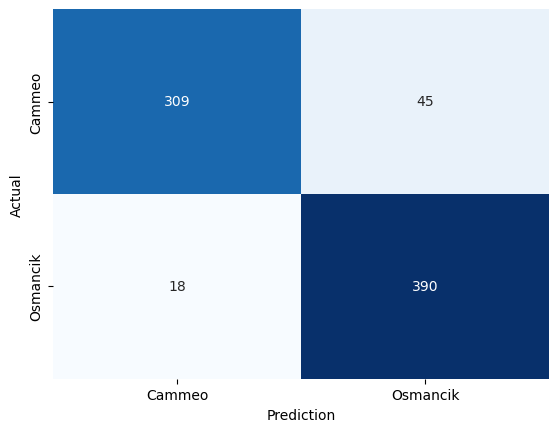

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
ax = sns.heatmap(c_matrix, annot = True,  fmt = 'd',                
                 xticklabels = ['Cammeo','Osmancik'],                
                 yticklabels = ['Cammeo','Osmancik'],                  
                 cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [32]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)

# Printing classification report
print(classification_report(y_test, y_test_pred_new))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       354
           1       0.90      0.96      0.93       408

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.92       762
weighted avg       0.92      0.92      0.92       762



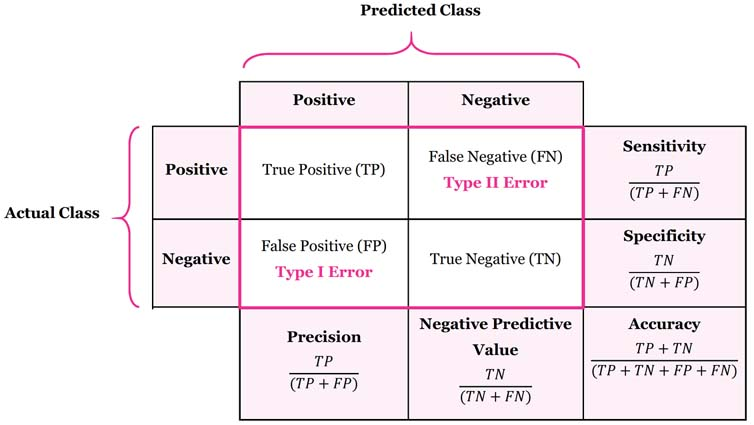

In [33]:
from IPython.display import Image
Image(filename='Image.png') 

Example of confusion matrix usage to evaluate the quality of the output of a rice data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

## Task 1

We are dealing with a dataset from the finance domain. We have a dataset where we are having 14 dimensions in total and 100000 records. The dimensions that we will be dealing with are as follows:-

* RowNumber:- Represents the number of rows
* CustomerId:- Represents customerId
* Surname:- Represents surname of the customer
* CreditScore:- Represents credit score of the customer
* Geography:- Represents the city to which customers belongs to
* Gender:- Represents Gender of the customer
* Age:- Represents age of the customer
* Tenure:- Represents tenure of the customer with a bank
* Balance:- Represents balance hold by the customer
* NumOfProducts:- Represents the number of bank services used by the customer
* HasCrCard:- Represents if a customer has a credit card or not
* IsActiveMember:- Represents if a customer is an active member or not
* EstimatedSalary:- Represents estimated salary of the customer
* Exited:- Represents if a customer is going to exit the bank or not.

Apply Neural Network Model on the above-mentioned dataset provided in the Tutorial folder named as "Churn_Modelling.csv" and compare accuracy with other models, such as Decision Tree, Random Forest, Logistic Regression and Support Vector Machine.

# ANN Regression

In [65]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [66]:
# Load the libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

The dataset describes 13 numerical properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. As such, this is a regression predictive modeling problem. Input attributes include things like crime rate, proportion of nonretail business acres, chemical concentrations and more.

This is a well-studied problem in machine learning. It is convenient to work with because all of the input and output attributes are numerical and there are 506 instances to work with.

Reasonable performance for models evaluated using Mean Squared Error (MSE) are around 20 in squared thousands of dollars (or $4,500 if you take the square root). This is a nice target to aim for with our neural network model.

In [67]:
# load dataset
dataframe = pd.read_csv("housing.csv", delim_whitespace = True, header = None)
df = dataframe.values

# split into input (X) and output (Y) variables
X = df[:,0:13]
y = df[:,13]

In [ ]:
print(X,y)

In [ ]:
input_shape=(13,) # shape number

In [68]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [69]:
# define wider model
def wider_model():
    # create model
    # `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
    model = Sequential()
    # Adds a layer instance on top of the layer stack. # Create a `Sequential` model and add a Dense layer as the first layer.
    model.add(Dense(20, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    
    # Compile model
    # The efficient ADAM optimization algorithm is used and a mean squared error loss function is optimized. 
    # This will be the same metric that we will use to evaluate the performance of the model.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [70]:
# Evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = wider_model, epochs = 100, 
                                         batch_size = 5, verbose = 0)))

estimator = KerasRegressor(build_fn = baseline_model, epochs = 100, batch_size = 5, verbose = 0)
kfold = KFold(n_splits = 10)
results = cross_val_score(estimator, X, y, cv = kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
# Me Results: 0.15 (0.60) MSE
# Muhammad Results: 0.12 (0.51) MSE


Results: 0.15 (0.60) MSE


# Task
Apply ANN to Predict Average Daily Rates for Hotels. Data set (H1) is available on Moodle. Use the following features (independent) for ANN and target feature customer (ADR) from the given dataset.

#### Independent Features
* IsCanceled
* Country
* MarketSegment
* DepositType
* CustomerType
* RequiredCarParkingSpaces
* ArrivalDateWeekNumber

In [ ]:
# Load the libraries
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)

# Load the libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset named as 'H1.csv'
train_df = pd.read_csv('H1.csv')

# Displau the records
a = train_df.head()

# Store the training records into 'b' dataframe
b = train_df

# Sort the values of the dataframe (b)
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending = True)

# Display the dataframe 

## Reference: 
* Neural Network Projects with Python by James Loy Published by Packt Publishing, 2019
* <p>https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik</p>